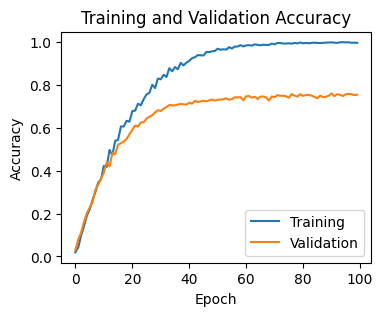

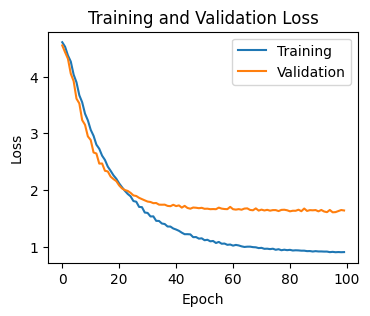

In [7]:
# rsync -av -e 'ssh -o ProxyCommand="ssh -q -W %h:%p s2016765@ssh.inf.ed.ac.uk"' s2016765@mlp.inf.ed.ac.uk:/home/s2016765/final_project/experiments/resnet50_aircraft_224_224 experiments/

import torch
from PIL import Image
import torchvision.transforms as transforms
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('result_outputs/summary.csv')

# Plotting the training and validation accuracy
plt.figure(figsize=(4, 3))
plt.plot(df['train_acc'], label='Training')
plt.plot(df['val_acc'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plotting the training and validation loss
plt.figure(figsize=(4, 3))
plt.plot(df['train_loss'], label='Training')
plt.plot(df['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


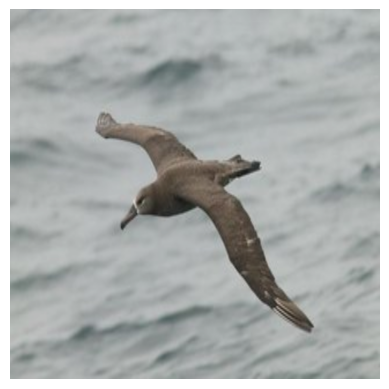

In [22]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((768, 768), interpolation=Image.BICUBIC),  # Resize to 224x224
    # transforms.CenterCrop(75),  # Crop to 224x224 at the center
    # transforms.Resize((512, 512), interpolation=Image.BICUBIC),
    transforms.ToTensor(),  # Convert PIL image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize
])

# Path to your image
image_path = "data/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0001_796111.jpg"

# Load and apply transformations
image = Image.open(image_path)
transformed_tensor = transform(image)

# Reverse normalization and convert tensor to PIL image
reverse_normalize = transforms.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225], std=[1/0.229, 1/0.224, 1/0.225])
reverse_transform = transforms.Compose([transforms.Normalize((0, 0, 0), (1, 1, 1)), transforms.ToPILImage()])
transformed_image = reverse_transform(reverse_normalize(transformed_tensor))

# Display the transformed image
plt.imshow(transformed_image)
plt.axis('off')
plt.show()